# Interpolación del precio de diamantes usando un modelo lineal y variables tipo Dummy
# Leemos los datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
df=pd.read_csv('diamonds_data.csv',low_memory=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Creamos columnas auxiliares que contienen los datos dummy

In [2]:
cut_dummy = pd.get_dummies(df['cut'],prefix='cut')
color_dummy = pd.get_dummies(df['color'],prefix='color')
clarity_dummy = pd.get_dummies(df['clarity'],prefix='clarity')
df = pd.concat([df, cut_dummy],axis=1)
df = pd.concat([df, color_dummy],axis=1)
df = pd.concat([df, clarity_dummy],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0


# Eliminamos las columnas auntiguas

In [3]:
df = df.drop(['cut','color','clarity'],axis=1)
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# Renombramos columnas

In [4]:
df = df.rename(columns={'cut_Fair':'Fair','cut_Good':'Good', 'cut_Ideal':'Ideal', 'cut_Premium':'Premium', 'cut_Very Good':'VeryGood', 'color_D':'D','color_E':'E', 'color_F':'F', 'color_G':'G', 'color_H':'H', 'color_I':'I', 'color_J':'J','clarity_I1':'I1', 'clarity_IF':'IF', 'clarity_SI1':'SI1', 'clarity_SI2':'SI2', 'clarity_VS1':'VS1','clarity_VS2':'VS2', 'clarity_VVS1':'VVS1', 'clarity_VVS2':'VVS2'})
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Fair', 'Good',
       'Ideal', 'Premium', 'VeryGood', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1',
       'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

# Aplicamos un modelo de KNN

In [5]:
Y=df['price'].values
df = df.drop(['price'],axis=1)
X=df.values

In [6]:
algoritmo = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
algoritmo.fit(X,Y)
Y2 = algoritmo.predict(X)

In [7]:
np.corrcoef(Y,Y2)

array([[1.       , 0.9554205],
       [0.9554205, 1.       ]])

In [8]:
for i in range(0,20):
    print('El precio del diamante de prueba número', i+1, ' es ', algoritmo.predict([X[i]]),'y debe ser', Y[i] )

El precio del diamante de prueba número 1  es  [326] y debe ser 326
El precio del diamante de prueba número 2  es  [326] y debe ser 326
El precio del diamante de prueba número 3  es  [327] y debe ser 327
El precio del diamante de prueba número 4  es  [334] y debe ser 334
El precio del diamante de prueba número 5  es  [335] y debe ser 335
El precio del diamante de prueba número 6  es  [336] y debe ser 336
El precio del diamante de prueba número 7  es  [336] y debe ser 336
El precio del diamante de prueba número 8  es  [446] y debe ser 337
El precio del diamante de prueba número 9  es  [337] y debe ser 337
El precio del diamante de prueba número 10  es  [526] y debe ser 338
El precio del diamante de prueba número 11  es  [339] y debe ser 339
El precio del diamante de prueba número 12  es  [340] y debe ser 340
El precio del diamante de prueba número 13  es  [663] y debe ser 342
El precio del diamante de prueba número 14  es  [344] y debe ser 344
El precio del diamante de prueba número 15 

Text(0.5, 0.98, 'En azul los precios reales y en rojo los interpolados')

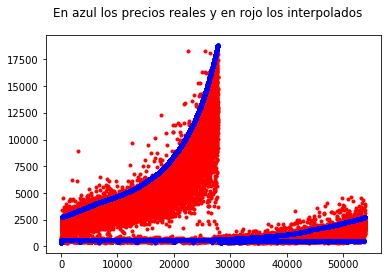

In [9]:
plt.plot(Y2,'r.',Y,'b.')
plt.suptitle('En azul los precios reales y en rojo los interpolados')

# Leemos los datos a interpolar y les aplicamos el mismo proceso que a los datos originales

In [10]:
df2=pd.read_csv('DIA.csv',low_memory=False)
cut_dummy = pd.get_dummies(df2['cut'],prefix='cut')
color_dummy = pd.get_dummies(df2['color'],prefix='color')
clarity_dummy = pd.get_dummies(df2['clarity'],prefix='clarity')
df2 = pd.concat([df2, cut_dummy],axis=1)
df2 = pd.concat([df2, color_dummy],axis=1)
df2 = pd.concat([df2, clarity_dummy],axis=1)
df2 = df2.drop(['cut','color','clarity','price'],axis=1)
df2 = df2.rename(columns={'cut_Fair':'Fair','cut_Good':'Good', 'cut_Ideal':'Ideal', 'cut_Premium':'Premium', 'cut_Very Good':'VeryGood', 'color_D':'D','color_E':'E', 'color_F':'F', 'color_G':'G', 'color_H':'H', 'color_I':'I', 'color_J':'J','clarity_I1':'I1', 'clarity_IF':'IF', 'clarity_SI1':'SI1', 'clarity_SI2':'SI2', 'clarity_VS1':'VS1','clarity_VS2':'VS2', 'clarity_VVS1':'VVS1', 'clarity_VVS2':'VVS2'})
df2.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,D,E,F,G,I,J,SI2,VS1,VS2,VVS2
0,0.71,63.1,58.0,5.64,5.71,3.58,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0.83,62.1,55.0,6.02,6.05,3.75,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0.50,61.5,55.0,5.11,5.16,3.16,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.39,61.6,59.0,4.67,4.71,2.89,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0.32,62.1,56.0,4.43,4.40,2.74,0,0,1,0,0,0,1,0,0,0,1,0,0


# Creamos las columnas faltantes y las acommodamos

In [11]:
df2['Fair']=0
df2['VeryGood']=0
df2['H']=0
df2['I1']=0
df2['IF']=0
df2['SI1']=0
df2['VVS1']=0
df2 = df2[['carat', 'depth', 'table', 'x', 'y', 'z', 'Fair', 'Good','Ideal', 'Premium', 'VeryGood', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1','IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']]
df2.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'Fair', 'Good', 'Ideal',
       'Premium', 'VeryGood', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF',
       'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

# Aplicamos el modelo a los datos dados y obtenemos los precios requeridos

In [12]:
X2=df2.values
for i in range(0,10):
    print('El precio del diamante número ', i+1, ' es ', algoritmo.predict([X2[i]]))

El precio del diamante número  1  es  [2450]
El precio del diamante número  2  es  [2960]
El precio del diamante número  3  es  [1614]
El precio del diamante número  4  es  [408]
El precio del diamante número  5  es  [776]
El precio del diamante número  6  es  [3267]
El precio del diamante número  7  es  [1752]
El precio del diamante número  8  es  [8149]
El precio del diamante número  9  es  [1050]
El precio del diamante número  10  es  [449]
